# 机器阅读理解(机器问答)

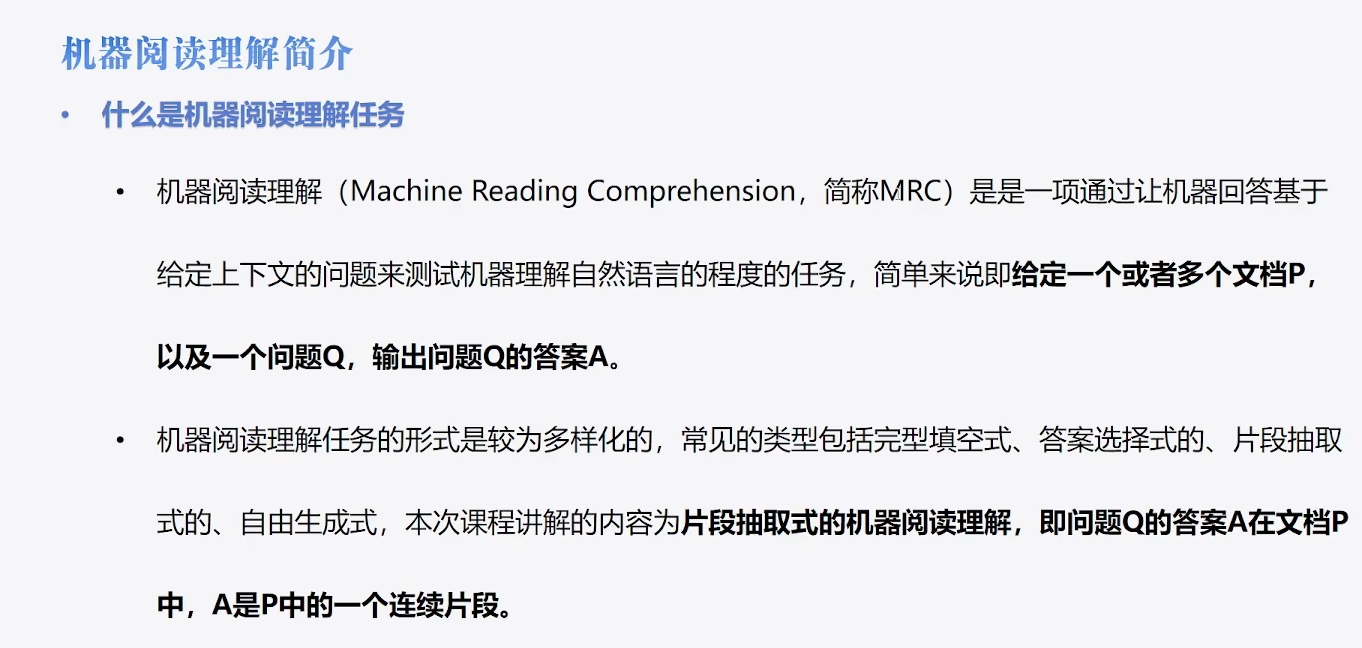

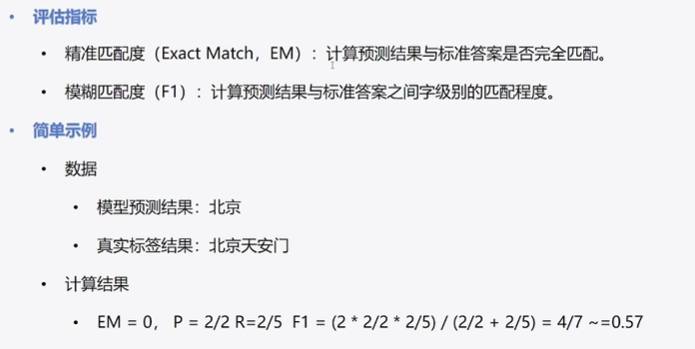

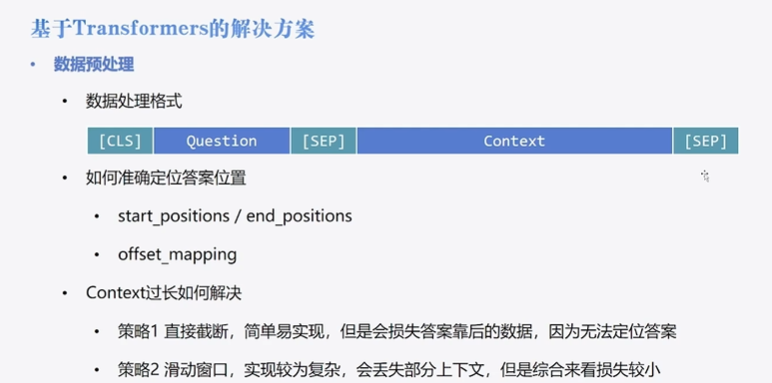

# 模型：*ModelForQuestionAnswering

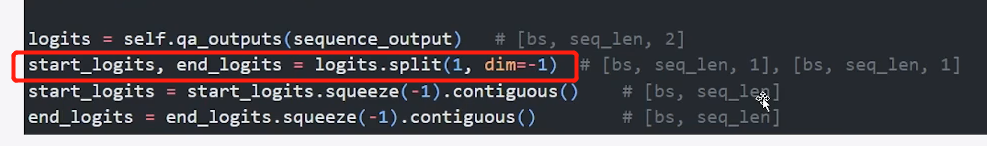

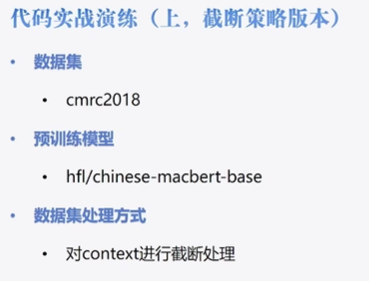

# 导包

In [1]:
from datasets import load_dataset,DatasetDict
from transformers import AutoTokenizer,AutoModelForQuestionAnswering,TrainingArguments,Trainer,DefaultDataCollator

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2,4'

/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


# 数据集加载

In [2]:
datasets = DatasetDict.load_from_disk("mrc_data")
datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'context', 'question', 'answers'],
        num_rows: 10142
    })
    validation: Dataset({
        features: ['id', 'context', 'question', 'answers'],
        num_rows: 3219
    })
    test: Dataset({
        features: ['id', 'context', 'question', 'answers'],
        num_rows: 1002
    })
})

# 数据预处理

## 1 tokenizer

In [3]:
tokenizer = AutoTokenizer.from_pretrained("hfl/chinese-macbert-base")
tokenizer

BertTokenizerFast(name_or_path='hfl/chinese-macbert-base', vocab_size=21128, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [4]:
sample_dataset = datasets["train"].select(range(10))
tokenized_example = tokenizer(text=sample_dataset['question'],
                              text_pair=sample_dataset['context'])
tokenized_example 
# 输出由三部分：
# input_ids
# token_type_ids
# attention_mask

{'input_ids': [[101, 5745, 2455, 7563, 3221, 784, 720, 3198, 952, 6158, 818, 711, 712, 3136, 4638, 8043, 102, 5745, 2455, 7563, 3364, 3322, 8020, 8024, 8021, 8024, 1760, 1399, 924, 4882, 185, 5735, 4449, 8020, 8021, 8024, 3221, 6632, 1298, 5384, 7716, 1921, 712, 3136, 3364, 3322, 511, 9155, 2399, 6158, 818, 711, 712, 3136, 8039, 8431, 2399, 6158, 3091, 1285, 711, 1921, 712, 3136, 3777, 1079, 2600, 3136, 1277, 2134, 2429, 5392, 4415, 8039, 8447, 2399, 6158, 3091, 1285, 711, 2600, 712, 3136, 8024, 1398, 2399, 2399, 2419, 6158, 3091, 1285, 711, 3364, 3322, 8039, 8170, 2399, 123, 3299, 4895, 686, 511, 5745, 2455, 7563, 754, 9915, 2399, 127, 3299, 8115, 3189, 1762, 6632, 1298, 2123, 2398, 4689, 1921, 712, 3136, 1355, 5683, 3136, 1277, 1139, 4495, 8039, 4997, 2399, 3198, 2970, 1358, 5679, 1962, 3136, 5509, 1400, 8024, 6158, 671, 855, 6632, 1298, 4868, 4266, 2372, 1168, 3777, 1079, 5326, 5330, 1071, 2110, 689, 511, 5745, 2455, 7563, 754, 9211, 2399, 1762, 3777, 1079, 1920, 934, 6887, 7368, 21

In [5]:
len(tokenized_example['input_ids'])

10

In [6]:
len(tokenized_example['input_ids'][0])

767

In [7]:
list(zip(tokenized_example['input_ids'][0],tokenized_example['token_type_ids'][0]))
# 第二个句子没有cls，两个句子之间只有sep（102）

[(101, 0),
 (5745, 0),
 (2455, 0),
 (7563, 0),
 (3221, 0),
 (784, 0),
 (720, 0),
 (3198, 0),
 (952, 0),
 (6158, 0),
 (818, 0),
 (711, 0),
 (712, 0),
 (3136, 0),
 (4638, 0),
 (8043, 0),
 (102, 0),
 (5745, 1),
 (2455, 1),
 (7563, 1),
 (3364, 1),
 (3322, 1),
 (8020, 1),
 (8024, 1),
 (8021, 1),
 (8024, 1),
 (1760, 1),
 (1399, 1),
 (924, 1),
 (4882, 1),
 (185, 1),
 (5735, 1),
 (4449, 1),
 (8020, 1),
 (8021, 1),
 (8024, 1),
 (3221, 1),
 (6632, 1),
 (1298, 1),
 (5384, 1),
 (7716, 1),
 (1921, 1),
 (712, 1),
 (3136, 1),
 (3364, 1),
 (3322, 1),
 (511, 1),
 (9155, 1),
 (2399, 1),
 (6158, 1),
 (818, 1),
 (711, 1),
 (712, 1),
 (3136, 1),
 (8039, 1),
 (8431, 1),
 (2399, 1),
 (6158, 1),
 (3091, 1),
 (1285, 1),
 (711, 1),
 (1921, 1),
 (712, 1),
 (3136, 1),
 (3777, 1),
 (1079, 1),
 (2600, 1),
 (3136, 1),
 (1277, 1),
 (2134, 1),
 (2429, 1),
 (5392, 1),
 (4415, 1),
 (8039, 1),
 (8447, 1),
 (2399, 1),
 (6158, 1),
 (3091, 1),
 (1285, 1),
 (711, 1),
 (2600, 1),
 (712, 1),
 (3136, 1),
 (8024, 1),
 (1398, 1),

In [8]:
tokenized_example = tokenizer(text=sample_dataset['question'],
                              text_pair=sample_dataset['context'],
                              max_length=384,
                              truncation='only_second',# 只对第二个句子截断
                              padding='max_length',
                              return_offsets_mapping=True)  # offse_mapping

In [9]:
tokenized_example.keys()  # 多了offse_mapping

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'offset_mapping'])

In [10]:
print(tokenized_example['offset_mapping'][0])

[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (97, 98), (98, 99), (

可以看到，cls和sep都是（0，0）

所以两个（0，0）之间就是句子文本

In [11]:
len(tokenized_example['offset_mapping'][0])

384

## offset mapping

将tokens下标（序号）和词下标（序号）对应起来

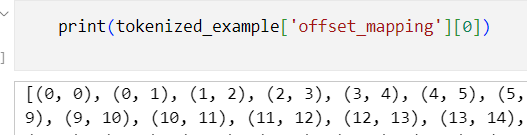

第一个token属于第一个词的意思

In [12]:
tokenized_example = tokenizer(text=sample_dataset['question'],
                              text_pair=sample_dataset['context'],
                              max_length=384,
                              truncation='only_second',# 只对第二个句子截断
                              padding='max_length',
                              return_offsets_mapping=True)  # offse_mapping

offset_mapping = tokenized_example.pop('offset_mapping')

In [13]:
# 在tokens得答案
'''
因为会对原文本做tokenizer，包括question、context、answer
所以要把原文本的答案定位（char位置）
转变为，tokens序列的位置，（一个char可能做子词拆分，变成多个tokens）
token序列位置，要用到offset mapping定位
offset_mapping是吧token序号和char序号对应起来
offser_mapping[i][tokens_id][0或1]：就是对应的char的位置
所以可以根据char位置推出tokens位置
使用decode对token进行接吗即可对应answer

下面还会用到sequence_ids，是用于区分句子对的第一句和第二句，
这里不用token_type_id，是因为后者不识别cls和sep，而前者会把cls和sep变成None
tokenized_example.sequence_ids()是一个方法，里面传入batch_index，就是句子的序号
'''


for i,offset in enumerate(offset_mapping):
    answer = sample_dataset['answers'][i]
    # 这是字符序号的开头与结尾，原文的起始位置，和做完tokenier的token序列的起始位置还不一样
    start_char = answer['answer_start'][0]
    end_char = start_char+len(answer['text'][0])
    print(answer)
    print('start_char',start_char,'end_char',end_char)

    # 这里第二个句子（context）变成tokens后，句子头、句子尾的tokens序号
    context_token_start = tokenized_example.sequence_ids(i).index(1) #第二句开头
    context_token_end = tokenized_example.sequence_ids(i).index(None, context_token_start)-1
    print('context_token_start',context_token_start,'context_token_end',context_token_end)

    # 因为tokens序列有截断，所以判断答案是否在tokens里
    # start_token_pos、end_token_pos是答案的，token序号头和尾
    if offset[context_token_start][0] > end_char or offset[context_token_end][1]<start_char:
        start_token_pos = 0
        end_token_pos = 0
    else:
        token_id = context_token_start
        while token_id<=context_token_end and offset[token_id][0]<start_char:
            token_id = token_id+1
        start_token_pos = token_id
        token_id = context_token_end
        while token_id>=context_token_start and offset[token_id][1] > end_char:
            token_id = token_id-1
        end_token_pos = token_id
    print('start_token_pos',start_token_pos,'end_token_pos',end_token_pos)
    # 把tokens 解码成原文
    print('token to answer str:', tokenizer.decode(tokenized_example['input_ids'][i][start_token_pos:end_token_pos+1]))

     

{'text': ['1963年'], 'answer_start': [30]}
start_char 30 end_char 35
context_token_start 17 context_token_end 382
start_token_pos 47 end_token_pos 48
token to answer str: 1963 年
{'text': ['1990年被擢升为天主教河内总教区宗座署理'], 'answer_start': [41]}
start_char 41 end_char 62
context_token_start 15 context_token_end 382
start_token_pos 53 end_token_pos 70
token to answer str: 1990 年 被 擢 升 为 天 主 教 河 内 总 教 区 宗 座 署 理
{'text': ['范廷颂于1919年6月15日在越南宁平省天主教发艳教区出生'], 'answer_start': [97]}
start_char 97 end_char 126
context_token_start 15 context_token_end 382
start_token_pos 100 end_token_pos 124
token to answer str: 范 廷 颂 于 1919 年 6 月 15 日 在 越 南 宁 平 省 天 主 教 发 艳 教 区 出 生
{'text': ['1994年3月23日，范廷颂被教宗若望保禄二世擢升为天主教河内总教区总主教并兼天主教谅山教区宗座署理'], 'answer_start': [548]}
start_char 548 end_char 598
context_token_start 17 context_token_end 382
start_token_pos 0 end_token_pos 0
token to answer str: [CLS]
{'text': ['范廷颂于2009年2月22日清晨在河内离世'], 'answer_start': [759]}
start_char 759 end_char 780
context_token_start 12 context_token_e

In [14]:
def process_func(example):
    # 分词
    tokenized_dataset = tokenizer(text=example['question'],
                              text_pair=example['context'],
                              max_length=384,
                              truncation='only_second',# 只对第二个句子截断
                              padding='max_length',
                              return_offsets_mapping=True)  # offse_mapping
    offset_mapping = tokenized_dataset.pop('offset_mapping')

    start_positions = []
    end_positions=[]
    for i,offset in enumerate(offset_mapping):
        answer = example['answers'][i]
        # 这是字符序号的开头与结尾，原文的起始位置，和做完tokenier的token序列的起始位置还不一样
        start_char = answer['answer_start'][0]
        end_char = start_char+len(answer['text'][0])

        # 这里第二个句子（context）变成tokens后，句子头、句子尾的tokens序号
        context_token_start = tokenized_dataset.sequence_ids(i).index(1) #第二句开头
        context_token_end = tokenized_dataset.sequence_ids(i).index(None, context_token_start)-1

        # 因为tokens序列有截断，所以判断答案是否在tokens里
        # start_token_pos、end_token_pos是答案的，token序号头和尾
        if offset[context_token_start][0] > end_char or offset[context_token_end][1]<start_char:
            start_token_pos = 0
            end_token_pos = 0
        else:
            token_id = context_token_start
            while token_id<=context_token_end and offset[token_id][0]<start_char:
                token_id = token_id+1
            start_token_pos = token_id
            token_id = context_token_end
            while token_id>=context_token_start and offset[token_id][1] > end_char:
                token_id = token_id-1
            end_token_pos = token_id
        start_positions.append(start_token_pos)
        end_positions.append(end_token_pos)
    
    tokenized_dataset["start_positions"]=start_positions
    tokenized_dataset["end_positions"] = end_positions
    return tokenized_dataset

In [15]:
tokenized_datasets = datasets.map(process_func,batched=True,remove_columns=datasets['train'].column_names)

In [16]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 10142
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 3219
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 1002
    })
})

# 加载模型

In [17]:
model = AutoModelForQuestionAnswering.from_pretrained("hfl/chinese-macbert-base")

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at hfl/chinese-macbert-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 配置TrainArgs

In [18]:
train_args = TrainingArguments(
    output_dir='my_QAmodel',
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    logging_steps=50,
    num_train_epochs=3
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# Trainer训练

In [19]:
trainer = Trainer(
    model=model,
    args=train_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=DefaultDataCollator()
)

/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [20]:
trainer.train()

/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss
1,2.826900,1.228804
2,1.180800,1.099059
3,0.984800,1.113468


/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=240, training_loss=1.496926244099935, metrics={'train_runtime': 180.5089, 'train_samples_per_second': 168.557, 'train_steps_per_second': 1.33, 'total_flos': 5962661340337152.0, 'train_loss': 1.496926244099935, 'epoch': 3.0})

# 训练好的模型预测

In [21]:
from transformers import pipeline

pipe = pipeline('question-answering',model = model,tokenizer=tokenizer,device = 1)
pipe

In [22]:
pipe(
    question="我的爸爸是谁",
    context='我的爸爸叫庄稼汉'
)

{'score': 0.9460711479187012, 'start': 5, 'end': 8, 'answer': '庄稼汉'}

# text-classification、NER、QA任务总结

1. tokenizer不同：
- TC：直接对句子tokenizer，关键是句子首尾多出cls和sep，可以指定return_tensors="pt"。
- NER：tokenizer的输入已经是拆好的词了，所以一定要写is_split_into_words=True，否则每个token前后都加cls和sep。
- QA：tokenier的输入是句子对（question和text原文本），所以要指定text和text_pair，return_offsets_mapping=True获得token_id和char_id的对应关系，sequence_ids区分第一句和第二句，比token_type_id好在会把cls和sep识别为None。

2. 预处理
- NER：一个词会被拆成多个token，所以原有的label可能无法一一对应，所以要根据word_id, 把token和词对应上，从而对应上lable_id。cls和sep的label_id为-100
- QA：1）offset_mapping是吧token序号和char序号对应起来，（0，0）就是cls或者sep；2）sequence_ids区分第一句和第二句

3. model输入

    - 都可以把model放入pipeline中，输入可以就是原文本

        - TC：logits = model(**inputs).logits

# 滑动窗口QA总结：

1. tokenizer加

    return_overflowing_tokens=True,  # 多滑动窗口
    
    stride=128, # 滑动窗口内容重叠

2. 加return_overflowing_tokens后，源数据集一条数据会被拆成n条，得到新的数据集，数量更大，数据id也会变。

    - 要把新数据集id和原数据集id对应
    - 用tokenized_edatasets["overflow_to_sample_mapping"]
        - sample_mapping = tokenized_edatasets["overflow_to_sample_mapping"]

        - sample_mapping[新数据id]得到原数据集数据id